In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df = df.rename(columns={"3.159499363321345566e-02": "X", "9.869877579082642072e-01": "Y" , "0.000000000000000000e+00" : "class"})

In [4]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
import matplotlib.pyplot as plt

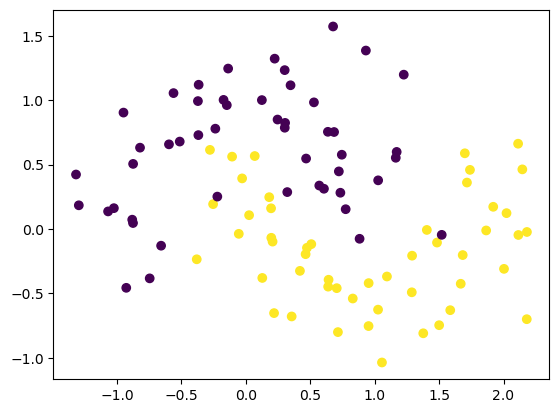

In [6]:
plt.scatter(df['X'] , df['Y'], c=df['class'])

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import tensorflow

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(2, activation='tanh' , input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-1.216309  , -0.12463665],
        [ 0.45229673, -0.41342306]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.042884 ],
        [-1.1719457]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights  = model.get_weights()

In [15]:
# First, get the current weights from the model
current_weights = model.get_weights()

# Initialize the initial_weights list with the same length as current_weights
initial_weights = [None] * len(current_weights)

# Now assign the values
initial_weights[0] = np.random.randn(current_weights[0].shape[0], current_weights[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(current_weights[1].shape)
initial_weights[2] = np.random.randn(current_weights[2].shape[0], current_weights[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(current_weights[3].shape)
initial_weights[4] = np.random.randn(current_weights[4].shape[0], current_weights[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(current_weights[5].shape)
initial_weights[6] = np.random.randn(current_weights[6].shape[0], current_weights[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(current_weights[7].shape)
initial_weights[8] = np.random.randn(current_weights[8].shape[0], current_weights[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(current_weights[9].shape)

In [ ]:
initial_weights[0] = np.random.randn(model.get_weights[0].shape[0] , model.get_weights()[0].shape[1]) *0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights[2].shape[0] , model.get_weights()[2].shape[1]) *0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights[4].shape[0] , model.get_weights()[4].shape[1]) *0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights[6].shape[0] , model.get_weights()[6].shape[1]) *0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights[8].shape[0] , model.get_weights()[8].shape[1]) *0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [16]:
X =np.array(X)
y = np.array(y)

In [18]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [19]:
history = model.fit(X , y , epochs=100 , validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.6046 - loss: 0.6720 - val_accuracy: 0.4500 - val_loss: 0.7067
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5929 - loss: 0.6751 - val_accuracy: 0.4500 - val_loss: 0.7049
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5929 - loss: 0.6692 - val_accuracy: 0.5500 - val_loss: 0.7032
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6265 - loss: 0.6646 - val_accuracy: 0.5500 - val_loss: 0.7015
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6226 - loss: 0.6640 - val_accuracy: 0.5500 - val_loss: 0.6998
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6578 - loss: 0.6502 - val_accuracy: 0.5500 - val_loss: 0.6981
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6304 - loss: 0.6585 - val_accuracy: 0.5500 - val_loss: 0.6965
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6109 - loss: 0.6631 - val_accuracy: 0.5500 - val_loss

In [20]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

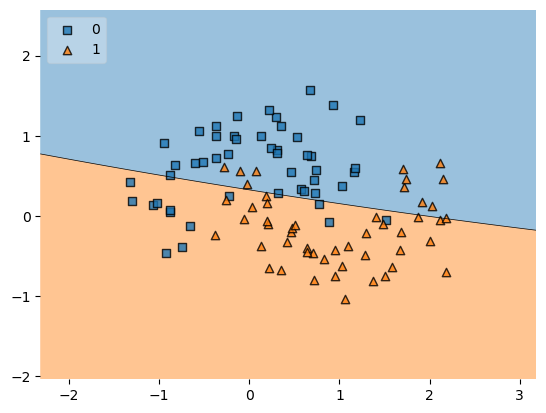

In [21]:
plot_decision_regions (X,y.astype('int') , clf=model , legend=2)

In [20]:
weights

[array([[-1.216309  , -0.12463665],
        [ 0.45229673, -0.41342306]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.042884 ],
        [-1.1719457]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.get_weights()

[array([[-0.94735557, -0.38902667],
        [ 0.17402643, -0.12684241]], dtype=float32),
 array([-0.13369972, -0.08279922], dtype=float32),
 array([[ 0.8082151],
        [-1.0969192]], dtype=float32),
 array([0.08789942], dtype=float32)]